In [1]:
import numpy as np

In [91]:
a = 0
b = 1
k = 40
N = 3
n = 51

In [92]:
h = (b - a) / k
h

0.025

In [105]:
def print_value(g):
    for i in g:
        print(round(i, 4))

$f(\tau) = 3\sin (\pi\tau)\sqrt{65-n+N\tau\sqrt{30-N}}\\  f(\tau) = 3\sin (\pi\tau)\sqrt{14+9\tau\sqrt{3}}$ 

In [112]:
def f(t):
    return 3 * np.sin(np.pi * t) * np.sqrt(14 + 9 * t * np.sqrt(3))

In [110]:
# Равномерная сетка
i = a
A = []
while (i <= b + 0.001):
    A.append(i)
    i += h
print("Равномерная сетка")
print_value(A)

Равномерная сетка
0
0.025
0.05
0.075
0.1
0.125
0.15
0.175
0.2
0.225
0.25
0.275
0.3
0.325
0.35
0.375
0.4
0.425
0.45
0.475
0.5
0.525
0.55
0.575
0.6
0.625
0.65
0.675
0.7
0.725
0.75
0.775
0.8
0.825
0.85
0.875
0.9
0.925
0.95
0.975
1.0


In [114]:
# Значения в узлах сетки
y = []
for i in A:
    y.append(f(i))
print("Значения в узлах сетки")
print_value(y)

Значения в узлах сетки
0.0
0.8929
1.8042
2.7276
3.6567
4.5848
5.5052
6.411
7.2956
8.1522
8.9742
9.7552
10.4888
11.1691
11.7904
12.3472
12.8346
13.248
13.5833
13.8367
14.0053
14.0864
14.078
13.9788
13.7879
13.5052
13.1312
12.6668
12.1139
11.4747
10.7523
9.9501
9.0724
8.1239
7.1097
6.0357
4.9081
3.7335
2.5189
1.2719
-0.0


In [117]:
a = y[:-1]
g = []
for i in range(len(a) - 1):
    g.append((a[i + 1] - a[i])/h)
print("g:\n")
print_value(g)

g:

35.715
36.4526
36.9379
37.1634
37.1235
36.8144
36.2344
35.3836
34.2643
32.8804
31.2381
29.3454
27.2123
24.8504
22.2732
19.496
16.5354
13.4097
10.1385
6.7427
3.2442
-0.3342
-3.9687
-7.6349
-11.3081
-14.9631
-18.5747
-22.1176
-25.5667
-28.8974
-32.0856
-35.1079
-37.9418
-40.566
-42.9601
-45.1054
-46.9844
-48.5814
-49.8824


In [141]:
s = h
l = 3*(h + h)
T = np.zeros((38, 38))
for i in range(38):
    if i == 0:
        T[i, i] = s
        T[i, i + 1] = l
    elif i == 37:
        T[i, i-1] = l
        T[i, i] = s
    else:
        T[i, i] = s
        T[i, i-1] = l
        T[i, i+1] = l
T

array([[0.025, 0.15 , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.15 , 0.025, 0.15 , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.15 , 0.025, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.025, 0.15 , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.15 , 0.025, 0.15 ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.15 , 0.025]])

In [142]:
T_inv = np.linalg.inv(T)
# for i in T_inv:
#     for j in i:
#         print(round(j, 4), end=" ")
#     print()
print(np.around(T_inv, 2))

[[-0.19  6.7  -0.92 ...  6.5   1.11 -6.69]
 [ 6.7  -1.12  0.15 ... -1.08 -0.19  1.11]
 [-0.92  0.15  0.9  ... -6.32 -1.08  6.5 ]
 ...
 [ 6.5  -1.08 -6.32 ...  0.9   0.15 -0.92]
 [ 1.11 -0.19 -1.08 ...  0.15 -1.12  6.7 ]
 [-6.69  1.11  6.5  ... -0.92  6.7  -0.19]]


In [143]:
r = []
for i in range(len(g) - 1):
    r.append((g[i+1] - g[i])*3)
r = np.array(r)
len(r)

38

In [144]:
c_i = np.dot(T_inv, r)
c = np.zeros(k)
c[0] = 0
c[k-1] = 0
for i in range(1, k-1):
    c[i] = c_i[i-1]
print("-------c:")
print_value(c)

-------c:
0.0
15.8198
12.1161
-8.1331
-6.2506
8.3763
-1.327
-19.7555
-12.396
-0.5663
-15.1871
-29.748
-17.7081
-9.9636
-27.8693
-36.9348
-21.52
-18.6903
-37.8786
-40.4201
-23.3012
-25.6672
-43.9881
-39.6911
-22.7219
-29.9861
-45.3809
-34.6816
-19.6959
-31.0179
-41.7486
-25.788
-14.3998
-28.4911
-33.3348
-13.8359
-7.2642
-22.5333
-20.9201
0.0


In [145]:
b = np.zeros(k) 
for i in range(k-1):
    b[i] = g[i] - h/3 * (2 * c[i] + c[i+1])
b[k-1] = b[k-2] + h * (c[k-2] + c[k-1])
print("-------b:")
print_value(b)

-------b:
35.5832
36.088
36.8038
37.3511
37.1579
36.6859
36.4212
35.8162
34.4756
33.0164
31.7391
29.9888
27.5905
25.2487
23.0455
20.2909
17.0498
14.0369
11.1067
7.6106
3.8464
0.4602
-2.9048
-6.784
-10.6795
-14.0852
-17.5293
-21.3754
-24.9799
-28.0325
-31.1749
-34.5581
-37.4644
-39.8134
-42.2893
-44.8143
-46.6755
-48.0315
-49.5337
-50.0567


In [146]:
d = np.zeros(k) 
for i in range(k - 1):
    d[i] = (c[i + 1] - c[i]) / (3 * h)
    
d[k-1] = (y[k] - a[k-1] - b[k-1] * h - c[k-1] * h**2) / (h ** 3)
print("-------d:")
print_value(d)

-------d:
210.9306
-49.3822
-269.9892
25.0996
195.0257
-129.3774
-245.713
98.1263
157.729
-194.944
-194.1454
160.5315
103.2603
-238.743
-120.8731
205.5313
37.7296
-255.8443
-33.8865
228.2513
-31.5458
-244.2788
57.2933
226.256
-96.8568
-205.264
142.6575
199.8099
-150.9601
-143.0759
212.8071
151.8427
-187.8836
-64.5831
259.9861
87.6218
-203.5879
21.5095
278.935
-1309.6543


In [148]:
# # сетка
# print("Сетка:")
# print_value(A)
# # Функция
# print("Значения функции:")
# print_value(y)
# сплайны
print("Сплайны:")
spln = np.zeros(k+1)
spln[0] = a[0]
for i in range(0, k-1):
    spln[i+1] = a[i] + b[i] * h + c[i] * (h**2) + d[i] * (h**3)
print_value(spln)

Сплайны:
0.0
0.8929
1.8042
2.7276
3.6567
4.5848
5.5052
6.411
7.2956
8.1522
8.9742
9.7552
10.4888
11.1691
11.7904
12.3472
12.8346
13.248
13.5833
13.8367
14.0053
14.0864
14.078
13.9788
13.7879
13.5052
13.1312
12.6668
12.1139
11.4747
10.7523
9.9501
9.0724
8.1239
7.1097
6.0357
4.9081
3.7335
2.5189
1.2719
0.0


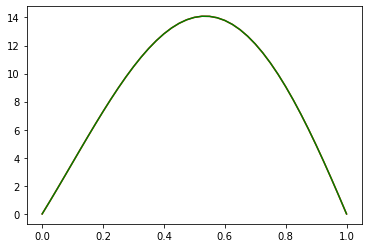

In [149]:
import matplotlib.pyplot as plt
plt.plot(A, spln, color = 'r')
plt.plot(A, y, color = 'g')
plt.show()

In [154]:
from sympy import *
t = Symbol("t")
f = 3 * sin(np.pi * t) * sqrt(14 + 9 * t * sqrt(3))
f

3*sqrt(9*sqrt(3)*t + 14)*sin(3.14159265358979*t)

In [156]:
# Производная функции
fp = diff(f, t)
fp

9.42477796076938*sqrt(9*sqrt(3)*t + 14)*cos(3.14159265358979*t) + 27*sqrt(3)*sin(3.14159265358979*t)/(2*sqrt(9*sqrt(3)*t + 14))

In [158]:
p1 = []
for i in A:
    p1.append(round(fp.subs(t, i), 4))
print_value(p1)

35.2643
36.1252
36.7380
37.0945
37.1881
37.0140
36.5696
35.8540
34.8684
33.6160
32.1017
30.3327
28.3180
26.0684
23.5965
20.9166
18.0448
14.9985
11.7967
8.4596
5.0087
1.4663
-2.1441
-5.7985
-9.4724
-13.1408
-16.7783
-20.3597
-23.8598
-27.2538
-30.5172
-33.6263
-36.5581
-39.2906
-41.8030
-44.0758
-46.0906
-47.8311
-49.2823
-50.4311
-51.2663


In [159]:
# производная сплайна
p2 = np.zeros(k + 1)
p2[0] = b[0]
for i in range(0, k):
    p2[i+1] = b[i] + 2 * c[i] * h + 3 * d[i] * h*h
print_value(p2)

35.5832
35.9787
36.7864
36.9034
36.9915
37.211
36.8621
35.8941
35.0124
34.1515
32.6225
30.6158
28.8024
26.8987
24.3029
21.4254
18.8295
16.0445
12.6226
9.1492
6.0175
2.6222
-1.2812
-4.9967
-8.3444
-11.9972
-15.9694
-19.5309
-22.7348
-26.2478
-29.8517
-32.8633
-35.5628
-38.5367
-41.359
-43.4685
-45.3418
-47.4205
-49.1178
-50.0567
-52.5123


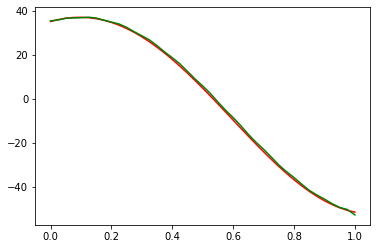

In [160]:
plt.plot(A, p1, color = 'r')
plt.plot(A, p2, color = 'g')
plt.show()